# SOAL UTS 
<ol>
    <li>print head dari data</li>
    <li>jelaskan apa yang dimaksud Dtype, dan sebutkan 3 data dalam phyton</li>
    <li>gabungkan kedua kolom dengan inner join berdasarkan nomor id</li>
    <li>jumlah baris tersisa setelah digabung</li>
    <li>tampilkan kategori salary in usd berdasasrkan kolom pekerjaan data analyst, pakailah visualisasi bar plot</li>
    <li>jelaskan histogram tersebut</li>
    <li>Ujilah menggunakan uji hipotesis dengan alfa 0.05, untuk mengetahui apakah terdapat perbedaan yang signifikan antara salary_in_usd berdasarkan kelompok jenis Data Analyst dan Data Engineer. Tuliskan dan rincikan semua tahap uji hipotesisnya</li>
    <li>Dengan menggunakan metode statistika deskriptif, tunjukkan hubungan antara salary_in_usd dengan remote_ratio pada pekerjaan Data Scientist</li>
    <li> Lakukan pengujian hipotesis satu sampel pada jenis pekerjaan Data Analyst, apakah rata-rata salary_in_usd lebih dari 100000. Tuliskan dan rincikan tahap uji hipotesisnya!</li>
    <li>Buatlah sebuah kesimpulan atau paragraf singkat terkait analisis yang telah saudara lakukan </li>
</ol>

# Layout Jawaban
<ol>
    <li>PRINT_DATA FRAME.HEAD()</li>
    <li>Dtype data: , contoh data: 1.int, 2. float, 3. string</li>
    <li>pakai function pd,merge(dataset, on='coloumn', how='method')</li>
    <li>print merged data, baca baris tersisa</li>
    <li>filter data yang telah dibuat pada nomor sebelumnya |  merged_data[merged_data['job_title'] == 'Data Analyst'], lalu buat barplotnya | plt.bar(data_analyst_data['ID'], data_analyst_data['salary_in_usd'], color='skyblue') </li>
    <li>beri deskripsi terhadap visualisasi data yang telah dibuat</li>
    <li>filter kolom ambil data engineer dan data analyst, pakai function dari stats module, beri logika bila p < t maka reject null, dan else accept</li>
    <li>korelasi remote_ratio dengan salary_in_usd dengan scatter dan tes koefisien</li>
    <li>uji hipotesis dengan t test</li>
    <li>kesimpulan</li>
</ol>

# IMPORT MODULES


In [1]:
# Olah Data
import pandas as pd
import numpy as np
import statistics

# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sn

# Statistics
from scipy import stats

# IMPORT DATASET

In [2]:
tabel1 = pd.read_csv('Tabel1.csv')
tabel2 = pd.read_csv('Tabel2.csv')

In [3]:
print(tabel1)

        ID  work_year experience_level employment_type  \
0    15640       2022               EX              FT   
1    15065       2022               SE              FT   
2    13046       2022               EX              FT   
3    16852       2022               SE              FT   
4    11591       2022               MI              FT   
..     ...        ...              ...             ...   
285  15631       2021               EN              FT   
286  14230       2020               MI              FT   
287  19846       2021               EN              FT   
288  14341       2021               EN              FT   
289  16526       2022               MI              FT   

                     job_title  
0           Analytics Engineer  
1                Data Engineer  
2           Analytics Engineer  
3                Data Engineer  
4                Data Engineer  
..                         ...  
285    Data Science Consultant  
286              Data Engineer  
287   

In [4]:
print(tabel2)

        ID  salary salary_currency  salary_in_usd employee_residence  \
0    19043  215300             USD         215300                 US   
1    19783  276000             USD         276000                 US   
2    13270   95000             GBP         124333                 GB   
3    10519   60000             GBP          76958                 GB   
4    13928  216000             USD         216000                 US   
..     ...     ...             ...            ...                ...   
245  11512  116000             USD         116000                 US   
246  18170  150000             CAD         118187                 CA   
247  16900   19000             EUR          21669                 IT   
248  16842   38400             USD          38400                 VN   
249  14035  100000             USD         100000                 US   

     remote_ratio company_location company_size  
0               0               US            L  
1               0               US 

### No. 1
Print dataset.head()

In [5]:
tabel1.head().style.background_gradient(cmap='mako')

,ID,work_year,experience_level,employment_type,job_title
0,15640,2022,EX,FT,Analytics Engineer
1,15065,2022,SE,FT,Data Engineer
2,13046,2022,EX,FT,Analytics Engineer
3,16852,2022,SE,FT,Data Engineer
4,11591,2022,MI,FT,Data Engineer


In [6]:
tabel2.head().style.background_gradient(cmap='mako')

,ID,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,19043,215300,USD,215300,US,0,US,L
1,19783,276000,USD,276000,US,0,US,L
2,13270,95000,GBP,124333,GB,0,GB,M
3,10519,60000,GBP,76958,GB,100,GB,S
4,13928,216000,USD,216000,US,100,US,M


### No. 2
Jelaskan apa itu Dtype dan sebutkan 3 data dalam Phyton
<br>
D-Type atau tipe data adalah Tipe data adalah suatu media atau memori pada komputer yang digunakan untuk menampung informasi. 
<br>
Contoh 3 Tipe data dalam phyton yaitu:
<lo>
    <li>Integer</li>
    <li>Float</li>
    <li>String</li>
</lo>

### No. 3

Merger kedua data dengan ID sebagai primary key dan gunakan methode <b>INNER JOIN

In [7]:
# Merge tables using inner join on ID
merged_data = pd.merge(tabel1, tabel2, on='ID', how='inner') #function pd.merge()

# Display merged data
merged_data.head().style.background_gradient(cmap='mako')


,ID,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,15640,2022,EX,FT,Analytics Engineer,135000,USD,135000,US,100,US,M
1,16852,2022,SE,FT,Data Engineer,140250,USD,140250,US,100,US,M
2,11591,2022,MI,FT,Data Engineer,75000,GBP,98158,GB,0,GB,M
3,15816,2022,SE,FT,Data Scientist,158200,USD,158200,US,100,US,L
4,16233,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M


### No.3 
Merger Data tabel1 dan tabel2

In [8]:
# Filter data for Data Scientist job titles
data_scientist_data = merged_data[merged_data['job_title'] == 'Data Scientist']

print(data_scientist_data)


        ID  work_year experience_level employment_type       job_title  \
3    15816       2022               SE              FT  Data Scientist   
6    19190       2022               SE              FT  Data Scientist   
14   15148       2022               MI              FT  Data Scientist   
16   16160       2021               SE              FT  Data Scientist   
18   18962       2020               MI              FT  Data Scientist   
20   15820       2022               MI              FT  Data Scientist   
22   13297       2022               SE              FT  Data Scientist   
27   15840       2022               SE              FT  Data Scientist   
29   18490       2022               SE              FT  Data Scientist   
30   12403       2020               SE              FT  Data Scientist   
31   15997       2022               SE              FT  Data Scientist   
33   15471       2021               EN              FT  Data Scientist   
38   15915       2021               MI

# No. 4
tampilkan sisa baris setelah dimerger

In [9]:
print (merged_data.columns)

Index(['ID', 'work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


### No. 5
pendapatan data analyst

In [10]:
data_scientist_salary = data_scientist_data.groupby('work_year')['salary_in_usd'].mean().reset_index()
data_scientist_salary

,work_year,salary_in_usd
0,2020,146692.200000
1,2021,60997.222222
2,2022,145860.000000


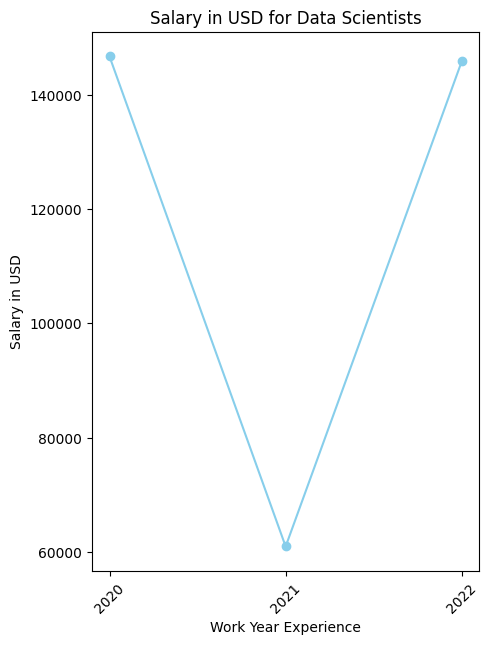

In [11]:
# Create bar plot
plt.figure(figsize=(5, 7))
plt.plot(data_scientist_salary['work_year'], data_scientist_salary['salary_in_usd'], marker='o',color='skyblue')
plt.xlabel('Work Year Experience')
plt.ylabel('Salary in USD')
plt.title('Salary in USD for Data Scientists')
plt.xticks(rotation=45)
plt.xticks(data_scientist_salary['work_year'])
plt.show()

### No. 6
Bar explanation
<br>
<br>
Pada bar tersebut terlihat bahwa pendapatan dalam dolar untuk pekerjaan data analyst tergolong sangat tinggi, tetapi pada tahun 2020 menuju 2021 mengalami penurunan hal ini dapat terjadi karena mengingat pada tahun tersebut ekonomi duniapun sedang sangat memburuk sehubungan dengan mewabahnya covid-19, namun demikian hal tersebut kembali normal ketika wabah mereda yang dapat terlihat pada transisi dari tahun 2021-2022.

### No. 7
uji hipotesis dengan alpha = 0.05

In [12]:
# Filter data for Data Analyst and Data Engineer job titles
data_analyst_salaries = merged_data[merged_data['job_title'] == 'Data Analyst']['salary_in_usd']
data_engineer_salaries = merged_data[merged_data['job_title'] == 'Data Engineer']['salary_in_usd']

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(data_analyst_salaries, data_engineer_salaries, equal_var=True)

# Define significance level
alpha = 0.05

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between salaries in USD based on the groups of Data Analyst and Data Engineer.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between salaries in USD based on the groups of Data Analyst and Data Engineer.")


T-statistic: -1.5838193377053795
P-value: 0.12039694890238588
Fail to reject the null hypothesis. There is no significant difference between salaries in USD based on the groups of Data Analyst and Data Engineer.


### No. 8 
hubungan antara salary_in_usd dengan remote menggunakan statistika deskriptif

Correlation coefficient: 0.2667910893806637


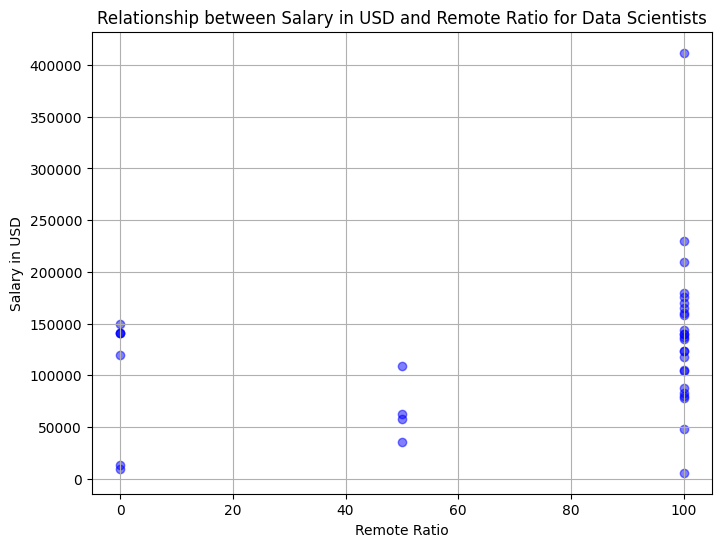

In [13]:
# Filter data for Data Scientist job titles
data_scientist_data = merged_data[merged_data['job_title'] == 'Data Scientist']

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(data_scientist_data['salary_in_usd'], data_scientist_data['remote_ratio'])[0, 1]

# Print correlation coefficient
print("Correlation coefficient:", correlation_coefficient)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data_scientist_data['remote_ratio'], data_scientist_data['salary_in_usd'], color='blue', alpha=0.5)
plt.title('Relationship between Salary in USD and Remote Ratio for Data Scientists')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.grid(True)
plt.show()


pada scatter plot membentuk garis lurus pada posisi masing-masing menunjukan bahwasannya korelasi antara remote_ratio dengan salary_in_usd adalah rendah, bila korelasi kuat maka seharusnya plot membentuk sebuah grafik lurus diagonal

nilai koefisien yang terbentuk adalah mendekati 0 dimana memiliki arti bahwasannya antara remote_ratio dengan salary_in_usd tidak memiliki korelasi. <b>(mendekati 1 = positif (X Y pergerakan searah) | 0 = Tidak ada relasi | mendekati -1 = negative (X Y pergerakan berlawanan arah)).

### No. 9
Uji hipotsesi satu sampel

In [14]:
# Filter data for Data Analyst job titles
data_analyst_salaries = merged_data[merged_data['job_title'] == 'Data Analyst']['salary_in_usd']

# Define null hypothesis (H0): average salary_in_usd for Data Analysts <= $100,000
# Define alternative hypothesis (H1): average salary_in_usd for Data Analysts > $100,000

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(data_analyst_salaries, popmean=100000)

# Define significance level
alpha = 0.05

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. The average salary_in_usd for Data Analysts is greater than $100,000.")
else:
    print("Fail to reject the null hypothesis. The average salary_in_usd for Data Analysts is not greater than $100,000.")


T-statistic: -1.3784061987320522
P-value: 0.18258713620824657
Fail to reject the null hypothesis. The average salary_in_usd for Data Analysts is not greater than $100,000.


## Conclusion
Data menunjukan bahwa pendapat berdasarkan dollar yang di dapat oleh data analyst masih tergolong tinggi dengan data tertinggi yaitu pada angka $412.000 USD mengalahkan kebanyakan pekerjaan lain bahkan machine learning dengan harga tertinggi di angka $276.000 USD. Walaupun average dari pendapatan data scientist masih di bawah $100.000 USD namun pekerjaan ini masih sangat layak untuk diidamkan bila ingin mencari pekerjaan dengan pendapatan tinggi.